# RoleSim
----
Similarity measure from the **automorphic** equivalence family.

In [60]:
import pandas as pd
import networkx as nx
import numpy as np
import time
from itertools import combinations
from networkx.algorithms.matching import max_weight_matching
import itertools
import matplotlib.pyplot as plt

from RoleSim.RoleSim import *

## replies-276.graphml

In [61]:
# Load directed graph
directed_graph = nx.read_graphml('graphs/replies-276.graphml')
# Convert the graph to an undirected graph
actual_data_graph = directed_graph.to_undirected()
# Remove any nodes with no edges
actual_data_graph.remove_nodes_from(list(nx.isolates(actual_data_graph)))
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 276
Number of edges: 880


In [62]:
# Create mapping dictionaries
node_to_index_dict = {node: idx for idx, node in enumerate(actual_data_graph.nodes())}
index_to_node_dict = {idx: node for node, idx in node_to_index_dict.items()}
# Relabel the graph nodes to integers
actual_data_graph = nx.relabel_nodes(actual_data_graph, node_to_index_dict)
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 276
Number of edges: 880


In [63]:
# Run RoleSim on graph
current_iteration = full_operation()
# Save the final RoleSim similarity graph?
nx.write_graphml(current_iteration, 'RoleSim/role_similarity-small.graphml')

0
0
[]
[]
Number of nodes: 0
Number of edges: 0
0  nodes were inserted in the graph.
0  nodes were pruned by rule 1.
0  nodes were pruned by rule 2.
0  nodes were pruned by rule 3.
0
0
[]
[]
Found current edges with weights,  0  of them.
Current count of edges,  0
Initial Graph of pruned magnitude
0
[]
--------------------
Iteration  1
--------------------
Previous_iteration
[]
Current_iteration
[]
Elapsed time  0.0
--------------------
Difference between iterations 0.0
Compared Difference between iterations nan
Ended after  1  iterations
Final iteration
[]


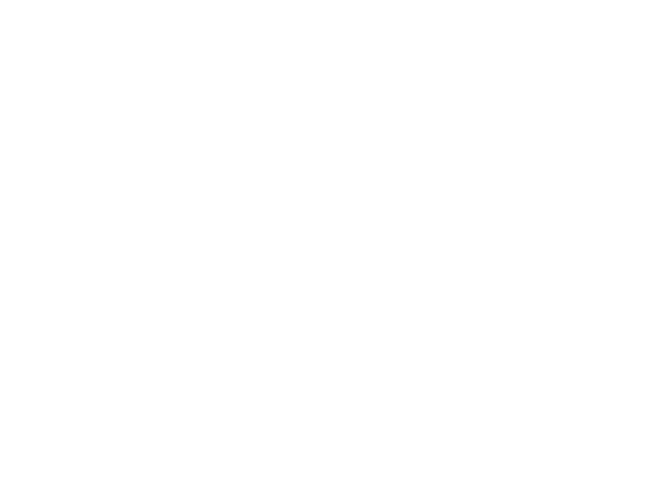

In [64]:
# Draw the graph with edge weights
pos = nx.spring_layout(current_iteration)
edge_labels = nx.get_edge_attributes(current_iteration, 'weight')
nx.draw(current_iteration, pos, with_labels=True, node_size=500)
nx.draw_networkx_edge_labels(current_iteration, pos, edge_labels=edge_labels)
plt.show()

## df_edge_list_directed_users_postings_replies.parquet

In [65]:
# Load .parquet data
postings_replies = pd.read_parquet('data/df_edge_list_directed_users_postings_replies.parquet')
# Randomly sample 10% of data
subset_postings_replies = postings_replies.sample(frac=0.1, random_state=1)
subset_postings_replies.head()

,ID_CommunityIdentity_Source,ID_CommunityIdentity_Target,count_posting_replies
781028,510681,66166,2
68617,26559,565355,4
620033,238360,501957,1
682167,499467,581430,2
789575,512318,573052,1


In [66]:
# Create undirected graph from the .parquet data
G = nx.Graph()
# Add edges to the graph, assuming count_posting_replies is the weight of the edges
for _, row in subset_postings_replies.iterrows():
    source = row['ID_CommunityIdentity_Source']
    target = row['ID_CommunityIdentity_Target']
    weight = row['count_posting_replies']
    if G.has_edge(source, target):
        G[source][target]['weight'] += weight  # Combine weights if edge exists
    else:
        G.add_edge(source, target, weight=weight)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 9910
Number of edges: 122349


In [67]:
# Convert the graph to an undirected graph
actual_data_graph = G.to_undirected()
# Remove any nodes with no edges
actual_data_graph.remove_nodes_from(list(nx.isolates(actual_data_graph)))
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 9910
Number of edges: 122349


In [68]:
# Create mapping dictionaries
node_to_index_dict = {node: idx for idx, node in enumerate(actual_data_graph.nodes())}
index_to_node_dict = {idx: node for node, idx in node_to_index_dict.items()}
# Relabel the graph nodes to integers
actual_data_graph = nx.relabel_nodes(actual_data_graph, node_to_index_dict)
print(f"Number of nodes: {actual_data_graph.number_of_nodes()}")
print(f"Number of edges: {actual_data_graph.number_of_edges()}")

Number of nodes: 9910
Number of edges: 122349


In [69]:
# Run RoleSim on graph
current_iteration = full_operation()
# Save the final RoleSim similarity graph?
nx.write_graphml(current_iteration, 'RoleSim/role_similarity.graphml')

0
0
[]
[]
Number of nodes: 0
Number of edges: 0
0  nodes were inserted in the graph.
0  nodes were pruned by rule 1.
0  nodes were pruned by rule 2.
0  nodes were pruned by rule 3.
0
0
[]
[]
Found current edges with weights,  0  of them.
Current count of edges,  0
Initial Graph of pruned magnitude
0
[]
--------------------
Iteration  1
--------------------
Previous_iteration
[]
Current_iteration
[]
Elapsed time  0.0
--------------------
Difference between iterations 0.0
Compared Difference between iterations nan
Ended after  1  iterations
Final iteration
[]


c:\Users\IvanB\OneDrive - TU Wien\University\TU Wien\2024W\194.050 Social Network Analysis\Project\equivalence-based-network-role-mining\RoleSim\RoleSim.py:303: RuntimeWarning: invalid value encountered in scalar divide
  print("Compared Difference between iterations", diff / current_iteration.number_of_edges())
